# --- Day 10: Pipe Maze ---

In [1]:
import itertools

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def read_input(infile):
    
    with open(infile) as f:
        m = [list(x) for x in f.read().split("\n") if x.strip()]
    m = np.array(m)
  
    # Convert to network
    G = nx.DiGraph()
    start = None
  
    # Nodes
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):  
            
            if m[i,j] != ".":
                G.add_node((i,j))
            
            if m[i,j] == "S":
                start = (i,j)      
    # Edges
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):  
            if m[i,j] != ".":

                connects = []
               
                if m[i, j] == "|":
                    connects = [(i+1, j), (i-1, j)]
                
                elif m[i, j] == "-":
                    connects = [(i, j+1), (i, j-1)]
                
                elif m[i, j] == "L":
                    connects = [(i-1, j), (i, j+1)]    
                
                elif m[i, j] == "J":
                    connects = [(i-1, j), (i, j-1)]  
                
                elif m[i, j] == "7":
                    connects = [(i+1, j), (i, j-1)]  

                elif m[i, j] == "F":
                    connects = [(i+1, j), (i, j+1)]  

                elif m[i, j] == "S":
                    connects = [(i+1, j), (i, j+1), (i-1, j), (i, j-1)]  

                
                #print(i,j, m[i, j], connects)
                
                for connect in connects:
                    if connect in G.nodes():
                        G.add_edge((i,j), connect)

    # Remove non-compatible edges
    for edge in list(G.edges):
        if edge[::-1] not in G.edges():
            G.remove_edge(*edge)
    G = G.to_undirected()
    
    return G, start, m

G, start, m = read_input("input.1.1.txt")

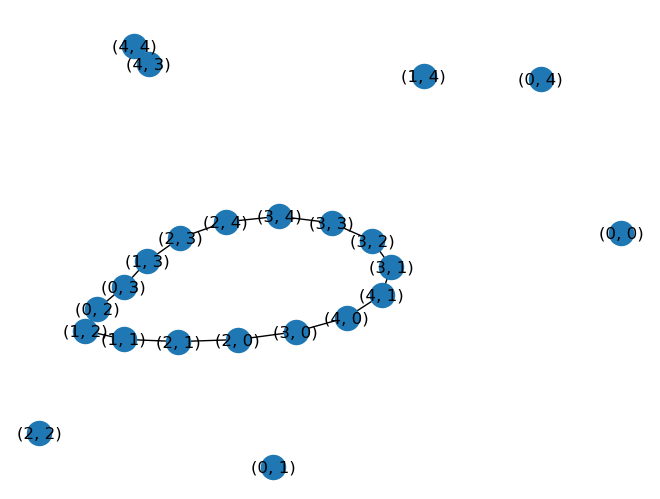

In [18]:
nx.draw(G, with_labels=True)

In [19]:
max(nx.single_source_shortest_path_length(G, start).values())

8

In [22]:
d = np.full(m.shape, ".")

for k,v in nx.single_source_shortest_path_length(G, start).items():
    d[k] = v
d

array([['.', '.', '4', '5', '.'],
       ['.', '2', '3', '6', '.'],
       ['0', '1', '.', '7', '8'],
       ['1', '4', '5', '6', '7'],
       ['2', '3', '.', '.', '.']], dtype='<U1')

In [33]:
G, start, m = read_input("input.txt")
max(nx.single_source_shortest_path_length(G, start).values())

6682

## --- Part Two ---
Figure out whether you have time to search for the nest by calculating the area within the loop. How many tiles are enclosed by the loop?

In [47]:
G, start, m = read_input("input.2.txt")

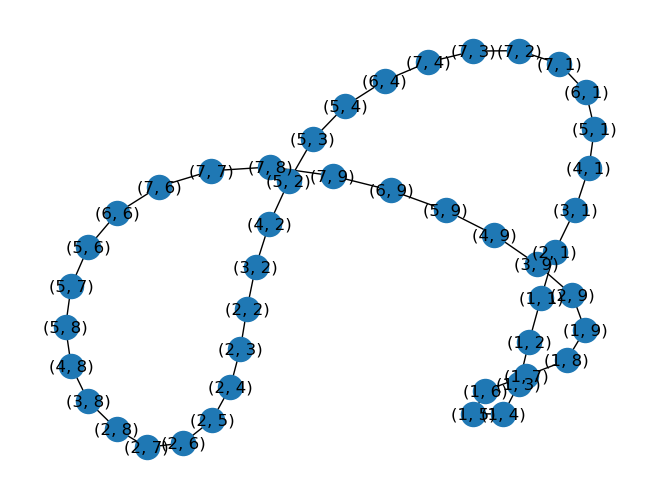

In [55]:
nx.draw(G, with_labels=True)

In [65]:
print(m.shape)
m

(9, 11)


array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', 'S', '-', '-', '-', '-', '-', '-', '-', '7', '.'],
       ['.', '|', 'F', '-', '-', '-', '-', '-', '7', '|', '.'],
       ['.', '|', '|', '.', '.', '.', '.', '.', '|', '|', '.'],
       ['.', '|', '|', '.', '.', '.', '.', '.', '|', '|', '.'],
       ['.', '|', 'L', '-', '7', '.', 'F', '-', 'J', '|', '.'],
       ['.', '|', '.', '.', '|', '.', '|', '.', '.', '|', '.'],
       ['.', 'L', '-', '-', 'J', '.', 'L', '-', '-', 'J', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']],
      dtype='<U1')

In [50]:
loop, = [x for x in nx.connected_components(G) if start in x]
print(len(loop))

46


In [64]:
print(list(loop))

[(3, 1), (4, 9), (5, 4), (5, 1), (5, 7), (2, 2), (1, 6), (2, 5), (1, 3), (1, 9), (2, 8), (7, 4), (7, 1), (7, 7), (4, 2), (3, 9), (5, 6), (4, 8), (5, 3), (5, 9), (2, 4), (1, 2), (2, 1), (2, 7), (1, 5), (6, 1), (1, 8), (6, 4), (7, 3), (7, 9), (7, 6), (3, 2), (4, 1), (5, 2), (3, 8), (5, 8), (1, 1), (1, 4), (2, 3), (2, 9), (1, 7), (2, 6), (7, 2), (6, 6), (6, 9), (7, 8)]


In [68]:
a = np.zeros(m.shape)

for idx in loop:
    a[idx] = 1
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [86]:
burrow = []
for i in range(a.shape[0]):
    for j in range(a.shape[1]):

        #print(i, j)
        
        if a[i, j] == 1:
            continue

        
        else:
            score = 0
        
            for ii in range(i, a.shape[0]):
                if a[ii, j] == 1:
                    score += 1
                    break

            for ii in range(i-1, -1, -1):
                if a[ii, j] == 1:
                    score += 1
                    break

            for jj in range(j, a.shape[1]):
                if a[i, jj] == 1:
                    score += 1
                    break

            for jj in range(j-1, -1, -1):
                if a[i, jj] == 1:
                    score += 1
                    break

            if score == 4:
                burrow.append((i, j))

        
burrow

[(3, 3),
 (3, 4),
 (3, 6),
 (3, 7),
 (4, 3),
 (4, 4),
 (4, 6),
 (4, 7),
 (6, 2),
 (6, 3),
 (6, 7),
 (6, 8)]